In [1]:
import sys
import os
# Import modules
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import multiprocessing as mp

In [6]:
# My python scripts
home = os.getenv("HOME")
sys.path.insert(0, home+'/Ridge/UMDataModules/')
sys.path.insert(0, home+'/Ridge/Inputs/')
sys.path.insert(0, home+'/Ridge/PlotModules/')
sys.path.insert(0, home+'/Ridge/PredictionModules/')

from ImportData import *
from PredictionData import *
from plotmapfunction import *
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from remove_ind import remove_ind
from SaveData import *
from remove_ind import *
import pickle
import multiprocessing as mp
import copy as cp
from Names import *

In [7]:
print(Names)

['No SO2 East Asia', 'No BC NHML', 'No SO2 NHML', 'No SO2 China', 'No SO2 US', 'No SO2 India', 'No SO2 Europe', 'No Dust Arabia', '2% Solar Constant increase', '3X CH4', '10X CFC-12', '10X Asia SO4', '2X CO2', '10X Asia BC', '10X BC', '10X Europe SO4', '5X SO4', 'pre-industrial SO4', 'No BC Global', '2xCO2 Global', 'No CO Global', 'No OC Global', 'No CH4 Global', 'No SO2 Global', 'No NOX Global', 'No VOC Global']


In [8]:
Noisy = ['No Dust Arabia','No VOC Global','No SO2 India','No OC Global','No NOX Global']
for runname in Noisy:
       (Names, [X_SfcTemp,X_GeoHeight500,X_RF,y]) = remove_ind(Names,runname,[X_SfcTemp,X_GeoHeight500,X_RF,y] )
print(Names)

['No SO2 East Asia', 'No BC NHML', 'No SO2 NHML', 'No SO2 China', 'No SO2 US', 'No SO2 Europe', '2% Solar Constant increase', '3X CH4', '10X CFC-12', '10X Asia SO4', '2X CO2', '10X Asia BC', '10X BC', '10X Europe SO4', '5X SO4', 'pre-industrial SO4', 'No BC Global', '2xCO2 Global', 'No CO Global', 'No CH4 Global', 'No SO2 Global']


In [5]:
# What is the predictor X?
X = X_SfcTemp
X_name = 'SfcTemp'

# Any dimension reduction (eg PCA) or full grid?
X_type = 'Full'
y_type = 'Full'


# alpha for regularisation, no of CV
alpha_list = np.logspace(-3,8,10)
no_of_cv = 5

# where to save?
savedir = home+'/WORK/RemoveNoiseNew/'
save_filename = 'X=SfcTemp_{},y={}_'.format(X_type,y_type)

# regions of interest for metrics?
from RegionLatitudes  import *
#regions_all = ['Global','Europe','US','China','East_Asia','India','NHML','Tropics','Africa','South_America','SHML','Arctic','Austrailia','NH','Tropics','SHML']
regions_all = ['Global']+RegionsList
d = PredictionData(X, y[:,118], Names, lons, lats, lons1, lats1)
d.setup(X_type,y_type)

d.save_X()

In [112]:
%%time 
name = Names[0]
alpha_list = [0.01,0.1,0.5,1.0,2.0]
alpha_list = [1.]
alpha_list = [.1]
d.run(X_type, y_type, 'Ridge', name, cvfolds=no_of_cv, alpha_list=alpha_list, 
      repeat_regularise=False, coefs=True, normalize=False)

No SO2 East Asia
0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1]
best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients
CPU times: user 60.7 ms, sys: 4.88 ms, total: 65.6 ms
Wall time: 61.7 ms


In [102]:
coef = d.coef.shape

In [103]:
print(d.coef.shape, 
      "\nTotal sum of coefficients:", np.sum(np.abs(d.coef)),
      "\nNon zero coefficients:", np.sum(d.coef!=0.))

(27840,) 
Total sum of coefficients: 5.192909648766692 
Non zero coefficients: 27840


In [104]:
lons = d.lons
lats = d.lats
nlon, nlat = len(lons),len(lats)

In [105]:
coef = d.coef[:].reshape((nlat,nlon))
coef.shape

(145, 192)

In [106]:
#coef[coef!=0.]

In [107]:
non_zero_lonlats = np.argwhere(coef!=0.)
non_zero_lats, non_zero_lons = non_zero_lonlats[:,0], non_zero_lonlats[:,1]
non_zero_lonlats = list(zip(lats[non_zero_lats], lons[non_zero_lons]))
#non_zero_lonlats

In [108]:
lons[0],lats[118]


(0.0, 57.5)

/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lonlat'
  s)


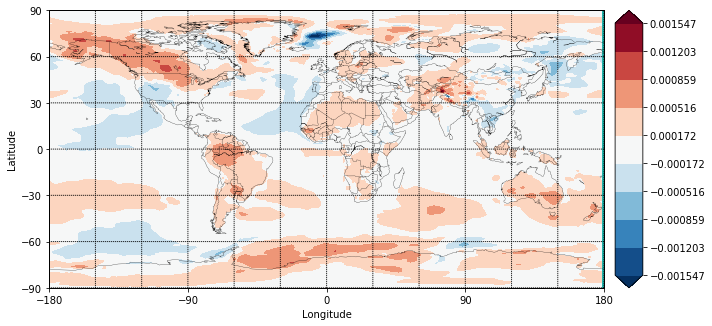

In [109]:
plt.figure(figsize=(10,5))
maxlvl = (np.max(np.abs(coef))*0.8)
levels = np.linspace(-maxlvl,maxlvl,10)
plotmap(lons, lats, coef, savefile=None, cmap="RdBu_r", levels=levels)
plt.show()